# 나는 책임이 없다
시작하기 전에 말하자면 나는 수학자도 아니며 통계학자도 아니다. 여기에 설명하는 것은 선배가 후배에게 이런 것이 있다 정도를 알려주기 위함이니 여기 있는 내용을 이해 했다고 하여 다 알았다고 생각해서도 안 되며 틀린 것을 발견했다고 하여 전체 내용이 문제있다고 봐서도 안 된다

## 우선 고유값, 고유벡터에 대해서 알아보고나 가자
고유값 (eigenvalue), 고유벡터 (eigenvector) 라는 개념

다음의 수식
\begin{equation*}
\mathbf{Vx}=\lambda\mathbf{x}
\end{equation*}
여기서 $\mathbf{V}$ 는 정방행렬, $\lambda$ 는 scarla 값, $\mathbf{x}$ 는 vector 일 때 $\lambda$ 를 고유값이라 정의하고 $\mathbf{x}$는 고유벡터라고 한다.
이에 대한 풀이는 http://darkpgmr.tistory.com/105 의 5번 항에  에 잘 정리 되어 있으므로 일단 잠시 보고 가자 



# 그럼 실제로 그런지 한번 봐보자

여기서 
\begin{equation*}
\mathbf{V} = \begin{vmatrix}
2 & -1 \\
-1 & 2 \\ 
\end{vmatrix}
\end{equation*}
로 두면 $\mathbf{V}$ 의 고유값을 계산해 보면 $\lambda$ 는 3과 1 이고 이때의 eigen vector 는 $y=x$ 위의 $(1,1)$ ($\lambda$ 가 1 일때) 와  $y=-x$ 위의 $(1, -1)$ ($\lambda 가 3 일 때$) 가 된다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def set_axes(ax,axlen=10):
    ax.set_xlim([-axlen,axlen]); ax.set_ylim([-axlen,axlen])
    ax.spines['bottom'].set_position(('data',0));ax.spines['left'].set_position(('data',0))
    ax.spines['top'].set_color('none'); ax.spines['right'].set_color('none')
def drawArrow(ax,a,b,debug=False):
    offset=0.5
    if debug: print("%s -> %s" %(str(a),str(b)))
    ax.arrow(a[0],a[1],b[0]-a[0],b[1]-a[1],head_width=offset,head_length=offset,fc='k',ec='k')



일단 임의의 점들에 대한 행렬 $\mathbf{V}$ 에 의한 벡터의 위치 변환을 보자

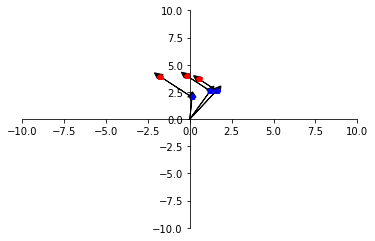

In [11]:
A=np.array([[2,-1],[-1,2]])
v1=np.array([1,1]); t1=np.dot(A,v1)
v2=np.array([1,3]); t2=np.dot(A,v2)

#vv=np.array([[1,-1,-1,1],[1,1,-1,-1]]); tt=np.dot(A,vv)
vv=np.random.rand(2,3)*3; tt=np.dot(A,vv)

fig=plt.figure(); ax = fig.add_subplot(1,1,1)
set_axes(ax)
ax.plot(vv[0],vv[1],"p",color='blue')
ax.plot(tt[0],tt[1],"p",color='red')
for ii in range(vv.shape[1]):
    drawArrow(ax,[0,0],vv[:,ii])
    drawArrow(ax,vv[:,ii],tt[:,ii],debug=False)

plt.show()

이번에는 고유벡터들에 대한 변환을 보자

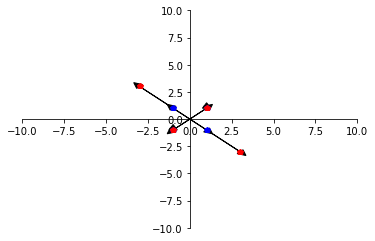

In [16]:
A=np.array([[2,-1],[-1,2]])
v1=np.array([1,1]); t1=np.dot(A,v1)
v2=np.array([1,3]); t2=np.dot(A,v2)

vv=np.array([[1,-1,-1,1],[1,1,-1,-1]]); tt=np.dot(A,vv)

fig=plt.figure(); ax = fig.add_subplot(1,1,1)
set_axes(ax)
ax.plot(vv[0],vv[1],"p",color='blue')
ax.plot(tt[0],tt[1],"p",color='red')
for ii in range(vv.shape[1]):
    drawArrow(ax,[0,0],vv[:,ii])
    drawArrow(ax,vv[:,ii],tt[:,ii],debug=False)

plt.show()

# PCA 를 한번 봐보자
이것도 앞에서 참조했던 다크 프로그래머님의 블로그를 참조해서 한번 보자. 이 외에도 PCA 에 대한 자료는 엄청 많이 있다.

http://darkpgmr.tistory.com/110?category=460967 의 `3. PCA의 계산` 을 보면 쉽게 알 수 있다.

그럼 실제적으로 어떻게 PCA 를 하는 지 코드를 통해서 살펴보자


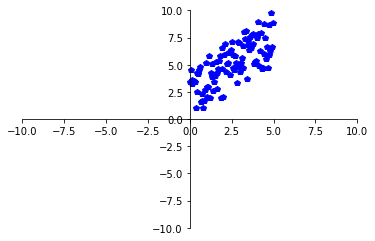

In [20]:
# 코드 예제

## 0단계
## vector 정의
v0=np.array((range(0,100)))/100.0
v1=v0+np.random.rand(100)
vv=np.array([v0,v1])*5
fig=plt.figure(); ax = fig.add_subplot(1,1,1)
set_axes(ax)
ax.plot(vv[0],vv[1],"p",color='blue')

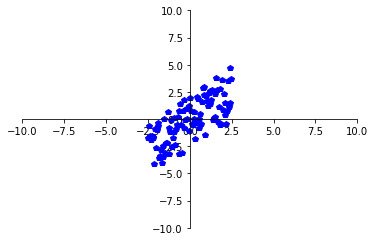

In [33]:
## 1단계
## centralization
muM = np.mean(vv,axis=1) # 행 방향 평균
vv_center = (vv.transpose()-muM).transpose()
fig=plt.figure(); ax = fig.add_subplot(1,1,1)
set_axes(ax)
ax.plot(vv_center[0],vv_center[1],"p",color='blue')

In [50]:
## 2단계
## covariance matrix 구하기
A=vv_center
C=np.dot(A.transpose(),A)

여기서 2차원 공간상에 있는 벡터들이므로 특이 벡터는 2개만 나타나야 정상이다. 즉 2개 빼고는 모두 0

[512.95669271  74.97739343]


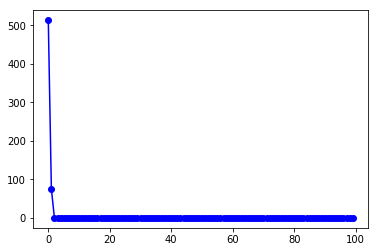

In [57]:
#3단계
## PCA
from scipy import linalg 
evals, evecs=linalg.eigh(C)
idx = np.argsort(evals)[::-1]
evecs=evecs[:,idx]
evals = evals[idx]
print(evals[:2])
fig=plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(evals,"b",evals,"o",color='blue')

[[-0.55175397 -0.83400693]
 [-0.83400693  0.55175397]]
1.3322676295501878e-15


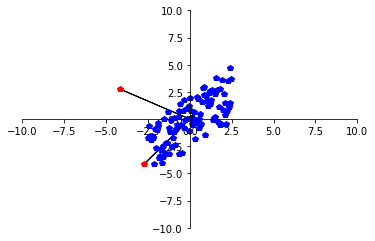

In [69]:
# 4단계
## eigen vector 를 표시해 보기
#print(evecs[:2,:])
U,S,Vt=np.linalg.svd(A)
fig=plt.figure(); ax = fig.add_subplot(1,1,1)
set_axes(ax)
ax.plot(vv_center[0],vv_center[1],"p",color='blue')
ax.plot(U[0]*5,U[1]*5,"p",color="red")
drawArrow(ax,U[:,0]*5,[0,0])
drawArrow(ax,U[:,1]*5,[0,0])

# PCA 와 SVD 의 관계는 무엇인가?
나도 잘 모른다 그냥 그리스 신화와 로마 신화의 관계 같다고나 할까 그 신이 그 신이고 이 신이 이 신인데 이름만 이랬다가 저랬다가 같은 것?
참고로 [ratsgo's blog](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/) 를 보면 결국 둘이 똑같은 기원을 가지고 있다는 것을 알 수 있다.

이 블로그에서 특이값 은 고유값의 제곱근이라고 보여주고 있다. 

즉 정리해보면
* 행렬 $\mathbf{A}$ 의 고유값, 고유벡터를 구하면 고유값 분해를 할 수 있다
* 어떤 covariance matrix 가 주어지면 고유값 분해를 이용해서 PCA 를 할 수 있다.
* 어떤 $m \times n$ 행렬 $\mathbf{A}$ 가 주어지면 $\mathbf{A}^T\mathbf{A}$ 를 통해 covariance matrix 를 만들고 고유값 분해를 통해 SVD 를 할 수 있다. 

참고로 특이값 분해의 기하학적 의미는 [다크 프로그래머님의 블로그](http://darkpgmr.tistory.com/106?category=460967) 의 `2. 특이값분해(SVD)의 기하학적 의미`를 참조하면 나와있으니 참조할 것


# 우리에게 가장 친숙한 예로 마쳐보자
svd 를 이용한 CNV 분석의 의미

그러면 CNV 를 svd 를 이용하여서 어떻게 noise 를 제거한 다는 것인가?

전체 target region 에 대한 depth 를 계산하고 vector 로 우리가 정의한다면 target region 차원만큼의 vector 가 만들어진다.

이를 샘플별로 모두 열벡터를 만들어 행렬 $\mathbf{A}$ 에 넣은 다음 SVD 를 하게 되면 우리는 특이값을 얻을 수가 있게 된다. 

그렇게 얻어진 특이값에서 **높은 값**들을 제거 하면 noise 가 제거가 된다.

보통 image 등에서는 높은 특이값들을 의미 있게 보는데 우리 capture 기반 방법에서는 높은 특이값들이 noise 라는 것이 알려져 있다.
